In [1]:
import wave as wave

import pyroomacoustics as pa

import numpy as np

In [6]:
pa.datasets.CMUArcticCorpus(basedir="./CMU_ARCTIC",download=True,speaker=["aew","axb"])

Download http://festvox.org/cmu_arctic/packed/cmu_us_aew_arctic.tar.bz2 into ./CMU_ARCTIC ...
Download http://festvox.org/cmu_arctic/packed/cmu_us_axb_arctic.tar.bz2 into ./CMU_ARCTIC ...


In [8]:
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"
wav = wave.open(sample_wave_file)

In [9]:
print("Sampling Frequency[Hz]: ",wav.getframerate())
print("Sample Size[Byte]: ", wav.getsampwidth())
print("the number of sample: ", wav.getnframes())
print("the number of channel: ", wav.getnchannels())

Sampling Frequency[Hz]:  16000
Sample Size[Byte]:  2
the number of sample:  62081
the number of channel:  1


In [10]:
data = wav.readframes(wav.getnframes())
data = np.frombuffer(data, dtype=np.int16)
wav.close()

In [11]:
import matplotlib.pyplot as plt

In [12]:
#dataの値を2Byteの変数が取り得る値の最大値で正規化
data = data/np.iinfo(np.int16).max

In [13]:
#x軸の値→サンプル数/サンプリング周波数
x = np.array(range(wav.getnframes()))/wav.getframerate()

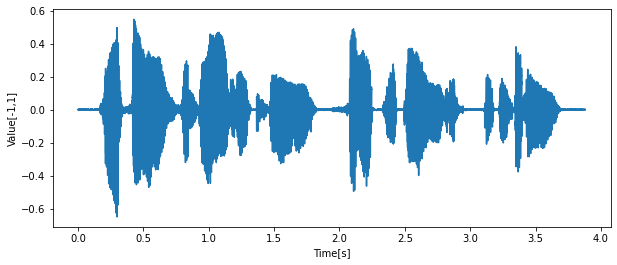

In [15]:
plt.figure(figsize=(10,4))
plt.xlabel("Time[s]")
plt.ylabel("Value[-1,1]")
plt.plot(x,data)
plt.savefig("./wave_form.png")
plt.show()